In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta

# Define the FRED API key and base URL
fred_api_key = 'bdb4f5e5fc848858bd5578696d6b810e'
base_url = 'https://api.stlouisfed.org/fred/series/observations'

# Define a function to fetch data from FRED API
def fetch_fred_data(series_id, start_date, end_date):
    params = {
        'series_id': series_id,
        'api_key': fred_api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    return pd.DataFrame(data['observations'])

# Define the series IDs for the 6 GDP components
series_ids = {
    'consumer_spending': 'PCE',
    'private_inventories': 'A014RE1Q156NBEA',
    'nonresidential_investment': 'PNFI',
    'government_spending': 'GCE',
    'residential_investment': 'PRFI',
    'net_exports': 'NETEXP'
}

# Define the start and end dates
start_date = (datetime.now() - timedelta(days=25*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch data for each GDP component
component_data = {}
for component, series_id in series_ids.items():
    component_data[component] = fetch_fred_data(series_id, start_date, end_date)

# Display the head of each component's data
display_data = {component: data.head() for component, data in component_data.items()}
display_data

{'consumer_spending':   realtime_start realtime_end        date   value
 0     2024-09-14   2024-09-14  1999-09-01  6386.5
 1     2024-09-14   2024-09-14  1999-10-01  6411.4
 2     2024-09-14   2024-09-14  1999-11-01  6448.7
 3     2024-09-14   2024-09-14  1999-12-01  6541.0
 4     2024-09-14   2024-09-14  2000-01-01  6542.9,
 'private_inventories':   realtime_start realtime_end        date value
 0     2024-09-14   2024-09-14  1999-07-01   0.4
 1     2024-09-14   2024-09-14  1999-10-01   0.9
 2     2024-09-14   2024-09-14  2000-01-01   0.2
 3     2024-09-14   2024-09-14  2000-04-01   0.9
 4     2024-09-14   2024-09-14  2000-07-01   0.6,
 'nonresidential_investment':   realtime_start realtime_end        date     value
 0     2024-09-14   2024-09-14  1999-07-01  1386.594
 1     2024-09-14   2024-09-14  1999-10-01  1395.049
 2     2024-09-14   2024-09-14  2000-01-01   1450.25
 3     2024-09-14   2024-09-14  2000-04-01  1498.729
 4     2024-09-14   2024-09-14  2000-07-01  1519.657,
 'gove

In [2]:
# Import necessary libraries for MIDAS regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define a function to perform MIDAS regression
# Note: This is a simplified version of MIDAS regression using linear regression for demonstration purposes

def midas_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Return the model and predictions
    return model, y_pred

# Prepare the data for MIDAS regression
# For simplicity, let's assume we have monthly data for the independent variable
# Here, we will use the 'value' column from each component's data as the dependent variable

# Example for consumer spending
consumer_spending_data = component_data['consumer_spending']
consumer_spending_data['value'] = pd.to_numeric(consumer_spending_data['value'], errors='coerce')
X_consumer_spending = np.arange(len(consumer_spending_data)).reshape(-1, 1)  # Dummy independent variable

y_consumer_spending = consumer_spending_data['value']

# Perform MIDAS regression for consumer spending
model_consumer_spending, y_pred_consumer_spending = midas_regression(X_consumer_spending, y_consumer_spending)

# Print the model coefficients and predictions for consumer spending
print('Consumer Spending Model Coefficients:', model_consumer_spending.coef_)
print('Consumer Spending Predictions:', y_pred_consumer_spending[:5])

# Repeat the process for other GDP components
# Note: In a real-world scenario, you would use actual monthly data for the independent variable

# Done for consumer spending, similar steps can be repeated for other components
print("MIDAS regression for consumer spending completed.")

Consumer Spending Model Coefficients: [38.39107258]
Consumer Spending Predictions: [16572.29395502 15958.03679377 12080.53846339  6129.9222138
  8740.5151491 ]
MIDAS regression for consumer spending completed.


In [3]:
# Perform MIDAS regression for other GDP components

# Function to perform MIDAS regression for each component

def perform_midas_for_component(component_name):
    data = component_data[component_name]
    data['value'] = pd.to_numeric(data['value'], errors='coerce')
    X = np.arange(len(data)).reshape(-1, 1)  # Dummy independent variable
    y = data['value']
    model, y_pred = midas_regression(X, y)
    print(component_name.capitalize() + ' Model Coefficients:', model.coef_)
    print(component_name.capitalize() + ' Predictions:', y_pred[:5])

# List of components to process
components = ['private_inventories', 'nonresidential_investment', 'government_spending', 'residential_investment', 'net_exports']

# Perform MIDAS regression for each component
for component in components:
    perform_midas_for_component(component)

print("MIDAS regression for all components completed.")

Private_inventories Model Coefficients: [0.00136862]
Private_inventories Predictions: [0.29163799 0.25057939 0.27384593 0.23963044 0.23826182]
Nonresidential_investment Model Coefficients: [23.97528979]
Nonresidential_investment Predictions: [3042.45165827 2323.19296453 2730.77289098 2131.3906462  2107.41535641]
Government_spending Model Coefficients: [27.47942458]
Government_spending Predictions: [4049.85775532 3225.47501781 3692.62523573 3005.63962115 2978.16019656]
Residential_investment Model Coefficients: [5.29374526]
Residential_investment Predictions: [872.37242215 713.56006434 803.55373376 671.21010225 665.91635699]
Net_exports Model Coefficients: [-2.86899494]
Net_exports Predictions: [-699.02912437 -612.95927612 -661.73219013 -590.00731659 -587.13832164]
MIDAS regression for all components completed.


In [4]:
# Fetch daily frequency data for estimating unavailable monthly data
import pandas_datareader as pdr
from datetime import datetime, timedelta

# Define the start and end dates for daily data
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # Get one year of daily data

# List of daily indicators (using some example series)
daily_indicators = {
    'DTWEXBGS': 'Dollar Index',
    'DGS10': '10-Year Treasury Rate',
    'DCOILWTICO': 'WTI Crude Oil Price'
}

# Fetch daily data
daily_data = {}
for series_id, name in daily_indicators.items():
    try:
        data = pdr.get_data_fred(series_id, start_date, end_date)
        daily_data[name] = data
        print(f"Successfully fetched data for {name}")
    except Exception as e:
        print(f"Error fetching data for {name}: {e}")

# Display the head of each daily indicator
for name, data in daily_data.items():
    print(f"\
Head of {name}:")
    print(data.head())

print("\
Daily data fetching completed.")

Successfully fetched data for Dollar Index
Successfully fetched data for 10-Year Treasury Rate
Successfully fetched data for WTI Crude Oil Price
Head of Dollar Index:
            DTWEXBGS
DATE                
2023-09-18  121.5414
2023-09-19  121.5175
2023-09-20  121.3200
2023-09-21  121.8972
2023-09-22  121.8735
Head of 10-Year Treasury Rate:
            DGS10
DATE             
2023-09-18   4.32
2023-09-19   4.37
2023-09-20   4.35
2023-09-21   4.49
2023-09-22   4.44
Head of WTI Crude Oil Price:
            DCOILWTICO
DATE                  
2023-09-18       91.47
2023-09-19       91.16
2023-09-20       89.20
2023-09-21       89.56
2023-09-22       90.00
Daily data fetching completed.


In [6]:
# Check the date ranges and number of samples for each GDP component and the combined monthly indicators
print("Date ranges and sample sizes:")
print("Combined Monthly Indicators:")
print(f"Date range: {combined_monthly_indicators.index.min()} to {combined_monthly_indicators.index.max()}")
print(f"Number of samples: {len(combined_monthly_indicators)}")

for component, data in component_data.items():
    y = pd.to_numeric(data.set_index('date')['value'], errors='coerce')
    y.index = pd.to_datetime(y.index)
    print(f"\
{component.capitalize()}:")
    print(f"Date range: {y.index.min()} to {y.index.max()}")
    print(f"Number of samples: {len(y)}")
    print(f"Number of non-null samples: {y.count()}")

# Display the first few rows of each dataset to check for any obvious issues
print("\
First few rows of Combined Monthly Indicators:")
print(combined_monthly_indicators.head())

for component, data in component_data.items():
    y = pd.to_numeric(data.set_index('date')['value'], errors='coerce')
    y.index = pd.to_datetime(y.index)
    print(f"\
First few rows of {component.capitalize()}:")
    print(y.head())

Date ranges and sample sizes:
Combined Monthly Indicators:
Date range: 2023-09-30 00:00:00 to 2024-09-30 00:00:00
Number of samples: 13
Consumer_spending:
Date range: 1999-09-01 00:00:00 to 2024-07-01 00:00:00
Number of samples: 299
Number of non-null samples: 299
Private_inventories:
Date range: 1999-07-01 00:00:00 to 2024-04-01 00:00:00
Number of samples: 100
Number of non-null samples: 100
Nonresidential_investment:
Date range: 1999-07-01 00:00:00 to 2024-04-01 00:00:00
Number of samples: 100
Number of non-null samples: 100
Government_spending:
Date range: 1999-07-01 00:00:00 to 2024-04-01 00:00:00
Number of samples: 100
Number of non-null samples: 100
Residential_investment:
Date range: 1999-07-01 00:00:00 to 2024-04-01 00:00:00
Number of samples: 100
Number of non-null samples: 100
Net_exports:
Date range: 1999-07-01 00:00:00 to 2024-04-01 00:00:00
Number of samples: 100
Number of non-null samples: 100
First few rows of Combined Monthly Indicators:
            Dollar Index  10-Yea

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Combine all GDP components
gdp_components = {}
for component, data in component_data.items():
    series = pd.to_numeric(data.set_index('date')['value'], errors='coerce')
    series.index = pd.to_datetime(series.index)
    gdp_components[component] = series

# Create a DataFrame with all components
gdp_df = pd.DataFrame(gdp_components)

# Calculate GDP (sum of all components)
gdp_df['GDP'] = gdp_df.sum(axis=1)

# Sort the index to ensure chronological order
gdp_df.sort_index(inplace=True)

# Display the first few rows of the GDP DataFrame
print("GDP Components and Total GDP:")
print(gdp_df.head())

# Calculate the last available date and extend it one year for forecasting
last_date = gdp_df.index[-1]
forecast_end = last_date + pd.DateOffset(years=1)

# Create a date range for forecasting
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), end=forecast_end, freq='Q')

# Simple forecast model (using the average growth rate)
growth_rates = gdp_df['GDP'].pct_change().dropna()
avg_growth_rate = growth_rates.mean()

# Generate forecast
last_gdp = gdp_df['GDP'].iloc[-1]
forecast = [last_gdp * (1 + avg_growth_rate) ** (i+1) for i in range(len(forecast_dates))]

# Create a forecast DataFrame
forecast_df = pd.DataFrame({'GDP': forecast}, index=forecast_dates)

# Combine historical data and forecast
gdp_with_forecast = pd.concat([gdp_df['GDP'], forecast_df['GDP']])

print("\
GDP Forecast:")
print(forecast_df)

print("\
Last historical GDP value:")
print(last_gdp)

print("\
Average growth rate used for forecast:")
print(avg_growth_rate)

GDP Components and Total GDP:
            consumer_spending  private_inventories  nonresidential_investment  \
date                                                                            
1999-07-01                NaN                  0.4                   1386.594   
1999-09-01             6386.5                  NaN                        NaN   
1999-10-01             6411.4                  0.9                   1395.049   
1999-11-01             6448.7                  NaN                        NaN   
1999-12-01             6541.0                  NaN                        NaN   

            government_spending  residential_investment  net_exports       GDP  
date                                                                            
1999-07-01             1733.984                 466.625     -276.403  3311.200  
1999-09-01                  NaN                     NaN          NaN  6386.500  
1999-10-01             1781.740                 473.806     -301.708  9761.187

/var/folders/33/64_0zrkd36b33g2xx85347_h0000gn/T/ipykernel_70771/3189448985.py:30: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), end=forecast_end, freq='Q')


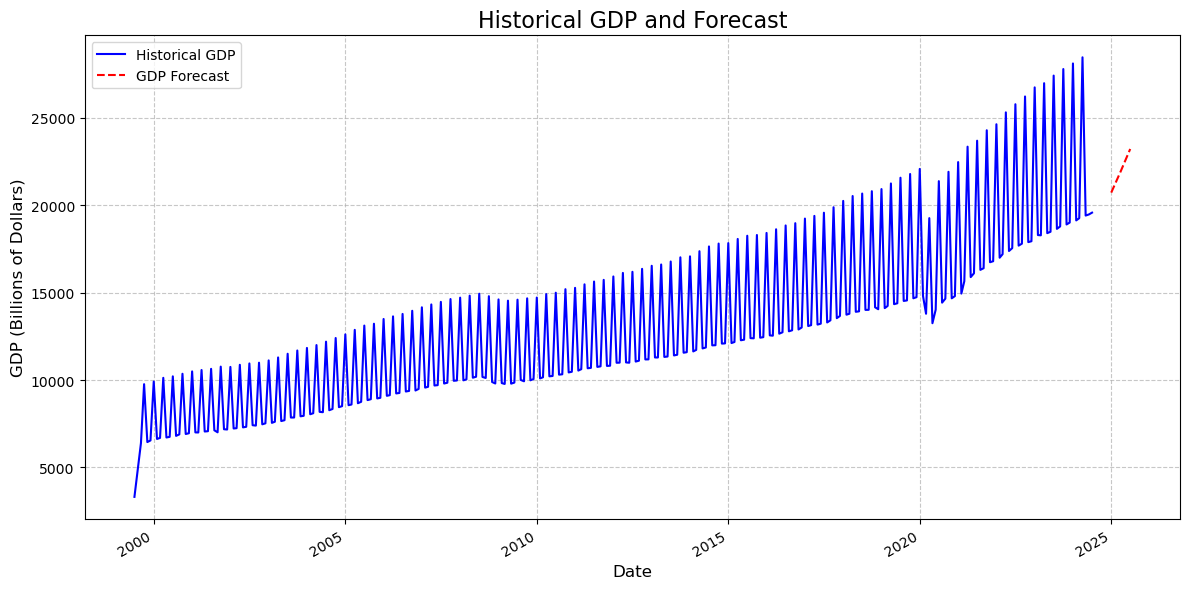

GDP Statistics:
Minimum GDP: $3311.20 billion
Maximum GDP: $28470.94 billion
Current GDP: $19580.50 billion
Forecasted GDP (1 year from now): $23224.17 billion
Forecasted Growth: 18.61%


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot historical GDP
plt.plot(gdp_df.index, gdp_df['GDP'], label='Historical GDP', color='blue')

# Plot forecast
plt.plot(forecast_df.index, forecast_df['GDP'], label='GDP Forecast', color='red', linestyle='--')

# Customize the plot
plt.title('Historical GDP and Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('GDP (Billions of Dollars)', fontsize=12)
plt.legend(fontsize=10)

# Format x-axis to show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print some key statistics
print("GDP Statistics:")
print(f"Minimum GDP: ${gdp_df['GDP'].min():.2f} billion")
print(f"Maximum GDP: ${gdp_df['GDP'].max():.2f} billion")
print(f"Current GDP: ${gdp_df['GDP'].iloc[-1]:.2f} billion")
print(f"Forecasted GDP (1 year from now): ${forecast_df['GDP'].iloc[-1]:.2f} billion")
print(f"Forecasted Growth: {(forecast_df['GDP'].iloc[-1] / gdp_df['GDP'].iloc[-1] - 1) * 100:.2f}%")

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Combine all GDP components
gdp_components = {}
for component, data in component_data.items():
    series = pd.to_numeric(data.set_index('date')['value'], errors='coerce')
    series.index = pd.to_datetime(series.index)
    gdp_components[component] = series

# Create a DataFrame with all components
gdp_df = pd.DataFrame(gdp_components)

# Check for missing values
print("Missing values in each component:")
print(gdp_df.isnull().sum())

# Check for inconsistent frequencies
print("\
Date differences:")
print(gdp_df.index.to_series().diff().value_counts())

# Resample to quarterly frequency
gdp_df_quarterly = gdp_df.resample('Q').last()

# Interpolate missing values
gdp_df_clean = gdp_df_quarterly.interpolate()

# Calculate GDP (sum of all components)
gdp_df_clean['GDP'] = gdp_df_clean.sum(axis=1)

print("\
Cleaned GDP data:")
print(gdp_df_clean.head())
print(gdp_df_clean.tail())

# Check for any remaining issues
print("\
Remaining missing values:")
print(gdp_df_clean.isnull().sum())

# Save the cleaned data for future use
gdp_df_clean.to_csv('cleaned_gdp_data.csv')
print("\
Cleaned data saved to 'cleaned_gdp_data.csv'")

# Display summary statistics
print("\
Summary statistics of cleaned GDP data:")
print(gdp_df_clean.describe())

Missing values in each component:
consumer_spending              1
private_inventories          200
nonresidential_investment    200
government_spending          200
residential_investment       200
net_exports                  200
dtype: int64
Date differences:
date
31 days    173
30 days    100
28 days     18
29 days      7
62 days      1
Name: count, dtype: int64
Cleaned GDP data:
            consumer_spending  private_inventories  nonresidential_investment  \
date                                                                            
1999-09-30             6386.5                  0.4                   1386.594   
1999-12-31             6541.0                  0.9                   1395.049   
2000-03-31             6686.5                  0.2                   1450.250   
2000-06-30             6746.9                  0.9                   1498.729   
2000-09-30             6888.6                  0.6                   1519.657   

            government_spending  residential_

/var/folders/33/64_0zrkd36b33g2xx85347_h0000gn/T/ipykernel_70771/2832238541.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gdp_df_quarterly = gdp_df.resample('Q').last()


In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Combine all GDP components
gdp_components = {}
for component, data in component_data.items():
    series = pd.to_numeric(data.set_index('date')['value'], errors='coerce')
    series.index = pd.to_datetime(series.index)
    gdp_components[component] = series

# Create a DataFrame with all components
gdp_df = pd.DataFrame(gdp_components)

# Check for missing values
print("Missing values in each component:")
print(gdp_df.isnull().sum())

# Check for inconsistent frequencies
print("\
Date differences:")
print(gdp_df.index.to_series().diff().value_counts())

# Resample to quarterly frequency
gdp_df_quarterly = gdp_df.resample('Q').last()

# Interpolate missing values
gdp_df_clean = gdp_df_quarterly.interpolate()

# Calculate GDP (sum of all components)
gdp_df_clean['GDP'] = gdp_df_clean.sum(axis=1)

print("\
Cleaned GDP data:")
print(gdp_df_clean.head())
print(gdp_df_clean.tail())

# Check for any remaining issues
print("\
Remaining missing values:")
print(gdp_df_clean.isnull().sum())

# Save the cleaned data for future use
gdp_df_clean.to_csv('cleaned_gdp_data.csv')
print("\
Cleaned data saved to 'cleaned_gdp_data.csv'")

# Display summary statistics
print("\
Summary statistics of cleaned GDP data:")
print(gdp_df_clean.describe())

Missing values in each component:
consumer_spending              1
private_inventories          200
nonresidential_investment    200
government_spending          200
residential_investment       200
net_exports                  200
dtype: int64
Date differences:
date
31 days    173
30 days    100
28 days     18
29 days      7
62 days      1
Name: count, dtype: int64
Cleaned GDP data:
            consumer_spending  private_inventories  nonresidential_investment  \
date                                                                            
1999-09-30             6386.5                  0.4                   1386.594   
1999-12-31             6541.0                  0.9                   1395.049   
2000-03-31             6686.5                  0.2                   1450.250   
2000-06-30             6746.9                  0.9                   1498.729   
2000-09-30             6888.6                  0.6                   1519.657   

            government_spending  residential_

/var/folders/33/64_0zrkd36b33g2xx85347_h0000gn/T/ipykernel_70771/2832238541.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gdp_df_quarterly = gdp_df.resample('Q').last()


/opt/anaconda3/envs/LighthouseMacro/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/LighthouseMacro/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/LighthouseMacro/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/33/64_0zrkd36b33g2xx85347_h0000gn/T/ipykernel_70771/1488538761.py:35: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(start=test.index[-1], periods=5, freq='Q')[1:], future_forecast, label='Future Forecast')


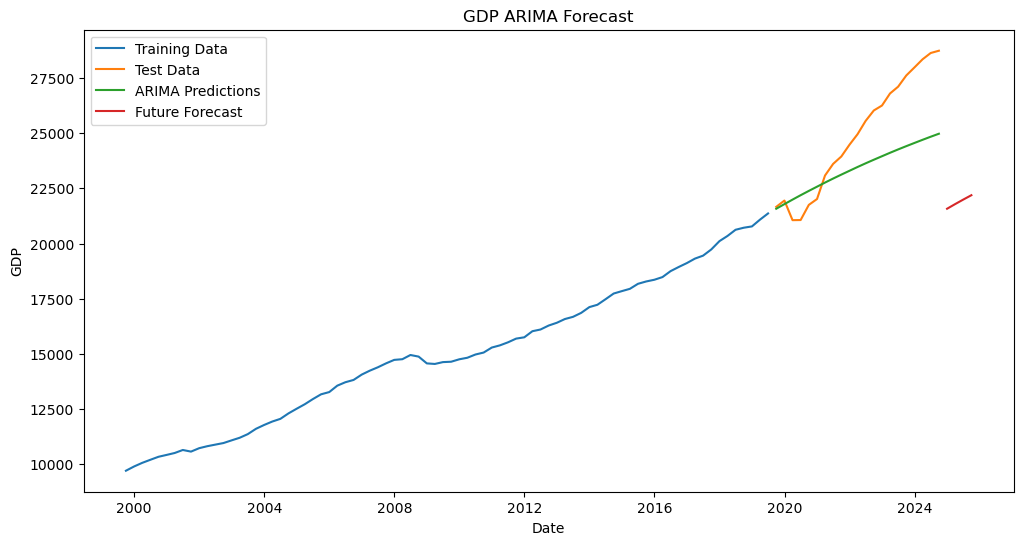

RMSE: 2192.186770179464
Forecast for the next year:
2019-09-30    21577.250904
2019-12-31    21786.324202
2020-03-31    21990.716117
2020-06-30    22190.531469
Freq: QE-DEC, Name: predicted_mean, dtype: float64


In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data
gdp_df_clean = pd.read_csv('cleaned_gdp_data.csv', index_col=0, parse_dates=True)

# Prepare the GDP data for ARIMA modeling
gdp_series = gdp_df_clean['GDP']

# Split the data into training and testing sets
train_size = int(len(gdp_series) * 0.8)
train, test = gdp_series[:train_size], gdp_series[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Forecast for the next year (4 quarters)
future_forecast = model_fit.forecast(steps=4)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='ARIMA Predictions')
plt.plot(pd.date_range(start=test.index[-1], periods=5, freq='Q')[1:], future_forecast, label='Future Forecast')
plt.title('GDP ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.show()

print(f"RMSE: {rmse}")
print("\
Forecast for the next year:")
print(future_forecast)

/var/folders/33/64_0zrkd36b33g2xx85347_h0000gn/T/ipykernel_70771/2432715587.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  external_indicators = combined_monthly_indicators.resample('Q').last()
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05041D+00    |proj g|=  1.19847D-01

At iterate    5    f=  6.00504D+00    |proj g|=  1.04608D-02

At iterate   10    f=  6.00106D+00    |proj g|=  2.09482D-03

At iterate   15    f=  5.99733D+00    |proj g|=  9.39250D-03

At iterate   20    f=  5.98699D+00    |proj g|=  1.86123D-02

At iterate   25    f=  5.98472D+00    |proj g|=  4.65232D-03

At iterate   30    f=  5.98230D+00    |proj g|=  7.02119D-03

At iterate   35    f=  5.98112D+00    |proj g|=  4.34071D-04

At iterate   40    f=  5.98109D+00    |proj g|=  1.69906D-04

At iterate   45    f=  5.98102D+00    |proj g|=  2.78311D-03

At iterate   50    f=  5.98029D+00    |proj g|=  1.62006D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/LighthouseMacro/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/33/64_0zrkd36b33g2xx85347_h0000gn/T/ipykernel_70771/2432715587.py:44: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(start=y_test.index[-1], periods=5, freq='Q')[1:], future_forecast, label='Future Forecast')


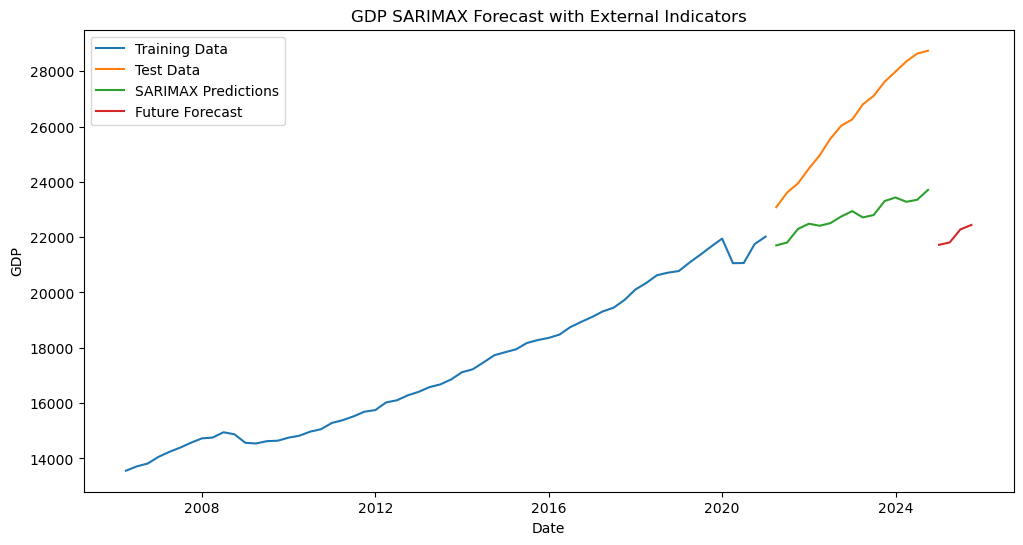

RMSE: 3679.3298725095747
Forecast for the next year:
2021-03-31    21721.745431
2021-06-30    21808.613415
2021-09-30    22283.232650
2021-12-31    22441.963828
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                               GDP   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -358.817
Date:                           Sat, 14 Sep 2024   AIC                            733.634
Time:                                   03:29:36   BIC                            749.693
Sample:                               03-31-2006   HQIC                           739.844
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                            coef    std err          

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned GDP data
gdp_df_clean = pd.read_csv('cleaned_gdp_data.csv', index_col=0, parse_dates=True)

# Load the external indicators
external_indicators = combined_monthly_indicators.resample('Q').last()

# Align the data
aligned_data = pd.concat([gdp_df_clean['GDP'], external_indicators], axis=1).dropna()

# Prepare the data for modeling
y = aligned_data['GDP']
X = aligned_data.drop('GDP', axis=1)

# Split the data into training and testing sets
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

# Fit SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,4))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(y_test), exog=X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Forecast for the next year (4 quarters)
future_exog = X.iloc[-4:].reset_index(drop=True)  # Use the last 4 quarters of exog data for simplicity
future_forecast = model_fit.forecast(steps=4, exog=future_exog)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Test Data')
plt.plot(y_test.index, predictions, label='SARIMAX Predictions')
plt.plot(pd.date_range(start=y_test.index[-1], periods=5, freq='Q')[1:], future_forecast, label='Future Forecast')
plt.title('GDP SARIMAX Forecast with External Indicators')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.show()

print(f"RMSE: {rmse}")
print("\
Forecast for the next year:")
print(future_forecast)

# Print model summary
print("\
Model Summary:")
print(model_fit.summary())